In [1]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

%matplotlib inline

In [16]:
train, test = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

trainX, testX, trainY, testY = train_test_split(train, test,test_size=0.5, random_state=2)

In [17]:
model = SVC(verbose=True)
model.fit(trainX, trainY)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [18]:
probs = model.decision_function(testX)

In [19]:
fop, mpv = calibration_curve(testY, probs, n_bins=10, normalize=True)

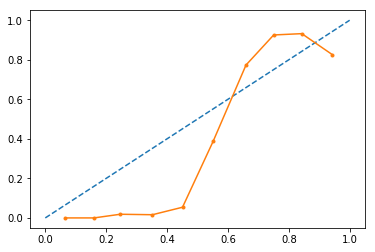

In [20]:
pyplot.plot([0,1], [0,1], linestyle='--')
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

The dotted blue line show the perfectly calibrated model. As we can see, out SVC perform not as well as expected. 

We can update the example above to fit the SVM via CalibratedClassifierCV class using 5-foldcross-validation, using hodlout sets to calibrate the predicted probability

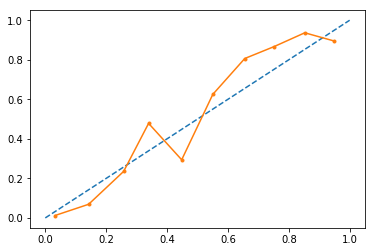

In [15]:
# SVM reliability diagram with calibration
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = SVC()
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(trainX, trainy)
# predict probabilities
probs = calibrated.predict_proba(testX)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(testy, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

# Put 2 model side-by-side

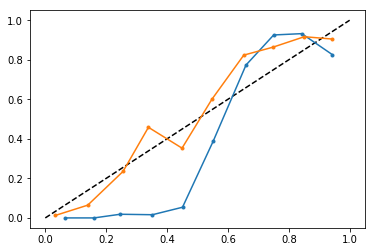

In [21]:
# predict uncalibrated probabilities
def uncalibrated(trainX, testX, trainy):
	# fit a model
	model = SVC()
	model.fit(trainX, trainy)
	# predict probabilities
	return model.decision_function(testX)
 
# predict calibrated probabilities
def calibrated(trainX, testX, trainy):
	# define model
	model = SVC()
	# define and fit calibration model
	calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
	calibrated.fit(trainX, trainy)
	# predict probabilities
	return calibrated.predict_proba(testX)[:, 1]
 
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# uncalibrated predictions
yhat_uncalibrated = uncalibrated(trainX, testX, trainy)
# calibrated predictions
yhat_calibrated = calibrated(trainX, testX, trainy)
# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(testy, yhat_uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(testy, yhat_calibrated, n_bins=10)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.')
pyplot.show()

# Note for self-studying 

- Understand calibrated classification
- Understand reliability diagram
- Apply to real problem (Titanic dataset)